# 관람객 토큰화 & 워드 클라우드

In [2]:
import re
from collections import Counter

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from konlpy.tag import Okt
from wordcloud import WordCloud

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 전처리 파일 불러오기

In [3]:
#파일경로 및 인코딩 설정
file = 'C:/coding/multicampus/프로젝트_주간_3조/기생충_네이버영화_관람객리뷰.csv'
encoding='utf8'
rev = pd.read_csv(file, encoding=encoding)
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36835 entries, 0 to 36834
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  36835 non-null  int64 
 1   ratings     36835 non-null  int64 
 2   reviews     36039 non-null  object
dtypes: int64(2), object(1)
memory usage: 863.4+ KB


In [4]:
rev.head()

,Unnamed: 0,ratings,reviews
0,0,10,"비에 젖지 않는 고급 장난감 텐트와, 비에 젖다 못해 잠겨버리는 반지하 가구"
1,1,10,최근 본 영화중 가장 충격적이었음... 근데 보니까 15세말고 19세 걸어야될것같던...
2,2,10,"지하철이라는 단어가 언급되는 순간, 대다수의 관객은 자신이 어디에 이입할 지를 안다."
3,3,10,전 가정부가 집 벨 누를 때 부터 이 영화는 장르가 바뀐다... 역대급 꿀잼영화
4,4,10,황금종려상 수상작을 자막 없이 볼 수 있다는 것 자체로 좋다.


## 전처리 함수

In [5]:
#토큰화
def token_konlpy(text):
    okt=Okt()
    return [word for word in okt.nouns(text) if len(word)>1] 

#데이터 전처리
def review_preproces_ko(data, stop_words): 
    line_text = re.sub(r"[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]", " ", str(data)) # 한글 외 특수문자 제거
    words=token_konlpy(line_text)   # 토큰화 
    words = [w for w in words if not w in stop_words] #불용어 제거
    return words

#워드클라우드 실행
def wordcloud(data):
    cloud = WordCloud(font_path = 'NanumGothic.ttf', background_color="white",
                      width=800, height=600).generate_from_frequencies(data) 
    plt.figure(figsize=(15,10))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show() 

In [6]:
########## 불용어처리
#불용어파일 위치 & 추가 불용어 설정
f = open('c:/coding/multicampus/datas/한글 불용어.txt', 'r', encoding='utf8')
stop_words = f.read().splitlines()
pop_word = ['영화', '진짜', '역시', '그냥', '최고', '보기', '정말', '역시', '보고', '포함', '이후'
            , '스포일러', '편도', '영화관', '정도', '편이', '장면', '느낌', '사람', '처음', '자체'
            , '이수', '내내', '계속', '간만', '때문', '하나', '조금', '완전', '무조건', '만큼']
[stop_words.append(stop) for stop in pop_word]
print(len(stop_words))

706


## 실행코드

In [7]:
# 전처리 column & 보이게할 단어 빈도수 설정
col = 'reviews'
view_num = 100

results =[]
for line in rev[col]: #전체 데이터 전처리
    result = review_preproces_ko(line, stop_words)
    results.append(result)

data = np.concatenate(results).tolist() #1차원 리스트로 축소

count = Counter(data)
word = dict(count.most_common(view_num)) 

print(word) #제대로 나왔는지 확인

{'생각': 3968, '봉준호': 3019, '감독': 2714, '기생충': 2309, '현실': 1674, '연기': 1520, '기분': 1351, '냄새': 1284, '작품': 1268, '가족': 1220, '충격': 1159, '배우': 1117, '사회': 1069, '재미': 1033, '송강호': 986, '스토리': 948, '내용': 876, '계획': 870, '여운': 828, '연출': 744, '다시': 744, '평점': 704, '이해': 700, '표현': 679, '의미': 676, '부자': 656, '한국': 642, '몰입': 633, '인생': 630, '마음': 620, '장르': 610, '반지하': 593, '마지막': 579, '한번': 576, '한국영': 574, '감상': 574, '관람': 558, '황금종려상': 551, '뭔가': 543, '가장': 518, '기대': 514, '조여정': 511, '가난': 500, '소름': 494, '이야기': 486, '인간': 480, '모든': 479, '별로': 447, '전개': 442, '천재': 436, '결말': 433, '반전': 428, '가슴': 422, '부분': 412, '대한': 401, '관객': 392, '명작': 392, '공감': 391, '모습': 387, '기생': 377, '예술': 361, '이선균': 360, '살인': 357, '중간': 357, '빈부격차': 352, '추천': 351, '이유': 351, '등급': 343, '긴장감': 338, '이영화': 329, '계급': 326, '감정': 325, '제목': 318, '해석': 312, '지금': 310, '가지': 307, '연기력': 307, '대박': 307, '개인': 306, '머리': 299, '몰입도': 291, '지하': 288, '세상': 286, '상징': 282, '아주': 275, '초반': 269, '후반': 269, '순간': 268

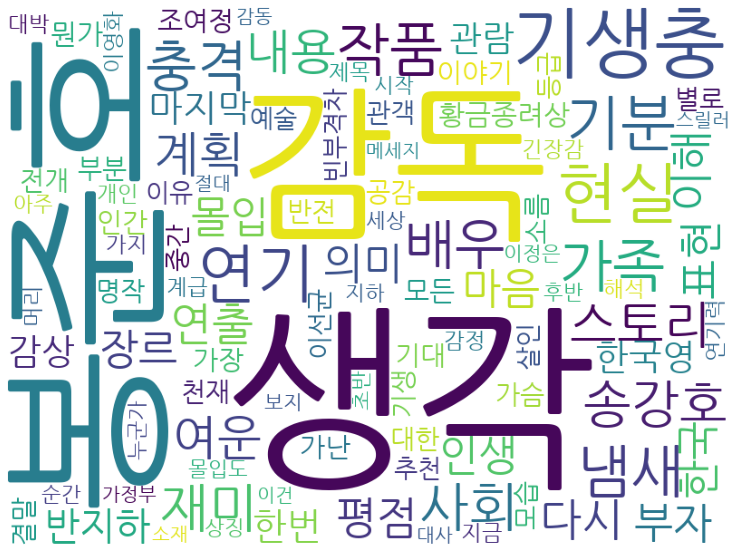

In [8]:
#워드클라우드 실행
wordcloud(word)

# 전문가 텍스트전처리&워드클라우드

In [9]:
file = 'C:/coding/multicampus/프로젝트_주간_3조/기생충_네이버영화_전문가리뷰.csv'
encoding='utf8'
rev = pd.read_csv(file, encoding=encoding)
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   point       16 non-null     int64 
 2   review      16 non-null     object
dtypes: int64(2), object(1)
memory usage: 512.0+ bytes


In [10]:
results =[]
for line in rev['review']: #전체 데이터 전처리
    result = review_preproces_ko(line, stop_words)
    results.append(result)

#1차원 리스트로 축소
data = np.concatenate(results).tolist()

# 단어빈도수 추가
view_num = 100
count = Counter(data)
word = dict(count.most_common(view_num)) 

print(word)

{'봉준호': 11, '장르': 8, '감독': 6, '사회': 5, '반지하': 4, '유머': 4, '기생충': 4, '배우': 4, '가족': 4, '이야기': 3, '연기': 3, '모든': 3, '계획': 3, '자본주의': 3, '하녀': 3, '확장': 3, '월드': 3, '지상': 2, '욕망': 2, '지하': 2, '서로': 2, '선사': 2, '인물': 2, '마음': 2, '위해': 2, '시선': 2, '아래': 2, '요소': 2, '관객': 2, '실감': 2, '납득': 2, '지점': 2, '설국열차': 2, '지대': 2, '계급': 2, '한국': 2, '입안': 2, '수직': 2, '바닥': 2, '김기영': 2, '블랙': 2, '작품': 2, '계단': 2, '취하': 2, '시대': 2, '가난': 1, '흔적': 1, '체취': 1, '추락': 1, '공포': 1, '공존': 1, '행복': 1, '간극': 1, '호러': 1, '두려움': 1, '빈틈': 1, '예상': 1, '전개': 1, '송곳': 1, '상징': 1, '의미': 1, '즐거움': 1, '만끽': 1, '동시': 1, '만난': 1, '행운': 1, '기생': 1, '탐구': 1, '박자': 1, '한바탕': 1, '난장': 1, '보이': 1, '미술': 1, '음악': 1, '구성': 1, '더없이': 1, '더욱': 1, '극장': 1, '순간': 1, '골목': 1, '지하철': 1, '풍경': 1, '전과': 1, '스스로': 1, '냄새': 1, '덩이': 1, '진정': 1, '완성': 1, '마지막': 1, '조각': 1, '상상력': 1, '실재': 1, '구현': 1, '감탄': 1, '무언가': 1, '송강호': 1, '코어': 1, '중심': 1, '완벽': 1, '올린다': 1}


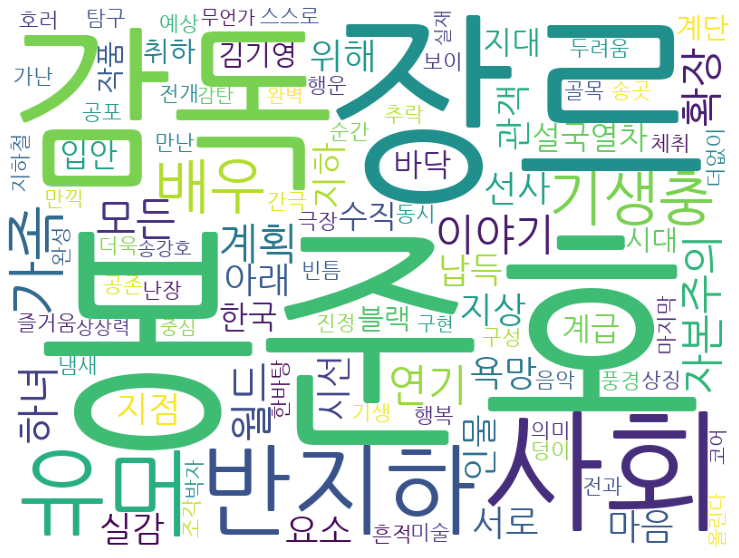

In [11]:
wordcloud(word)